# Importing necessary Libraries
* numpy for computation
* math for PI value


In [157]:
import numpy as np
#import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [64]:
#data = np.loadtxt(fname='sample_data/mnist_train_small.csv', delimiter=',')
samples = 1000
data_x = np.random.uniform(0,2*np.pi,samples).astype(np.float32)
data_y = np.sin(data_x).astype(np.float32)
#data = np.stack((data_x,data_y),axis=1
#data.shape

In [65]:
np.pi

3.141592653589793

In [66]:
# # prompt: differentiate data astype int8 int16 int32 float32

# import numpy as np

# # Assuming data_x and data_y are already defined as in your provided code

# # Differentiate with different data types
# data_x_int8 = data_x.astype(np.int8)
# data_x_int16 = data_x.astype(np.int16)
# data_x_int32 = data_x.astype(np.int32)
# data_x_float16 = data_x.astype(np.float16)
# data_x_float32 = data_x.astype(np.float32)

# print("data_x_int8:", data_x_int8)
# print("data_x_int16:", data_x_int16)
# print("data_x_int32:", data_x_int32)
# print("data_x_float16:", data_x_float16)
# print("data_x_float32:", data_x_float32)
# data_x_float16 - data_x_float32

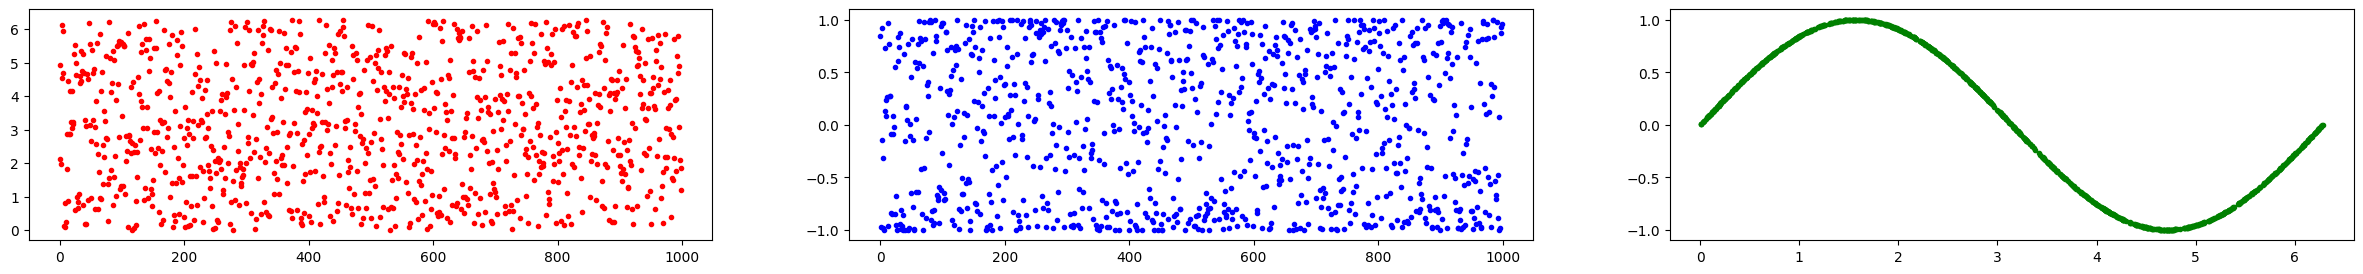

In [67]:
plotter  = plt.figure(figsize=(30,3))
plot_x = plotter.add_subplot(131)
plot_y = plotter.add_subplot(132)
plot_z = plotter.add_subplot(133)
plot_x.plot(data_x,'r.')
plot_y.plot(data_y,'b.')
plot_z.plot(data_x,data_y,'g.')
plotter.show()

# Data splitting and Noise addition


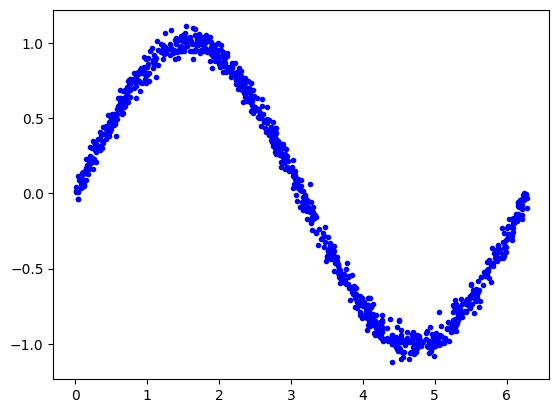

In [68]:
scale = 0.05
data_y = data_y + (scale * np.random.randn(*data_y.shape))
plt.plot(data_x,data_y,'b.')

#splitting data

In [72]:
training_data = int(0.6 * samples)
test_data = int(0.2 * samples + training_data)
print(training_data, test_data)

600 800


In [74]:
x_train,x_test, x_validatate = np.split(data_x,[training_data,test_data])
y_train,y_test, y_validatate = np.split(data_y,[training_data,test_data])
print(x_train.shape, x_test.shape,x_validatate.shape)

(600,) (200,) (200,)


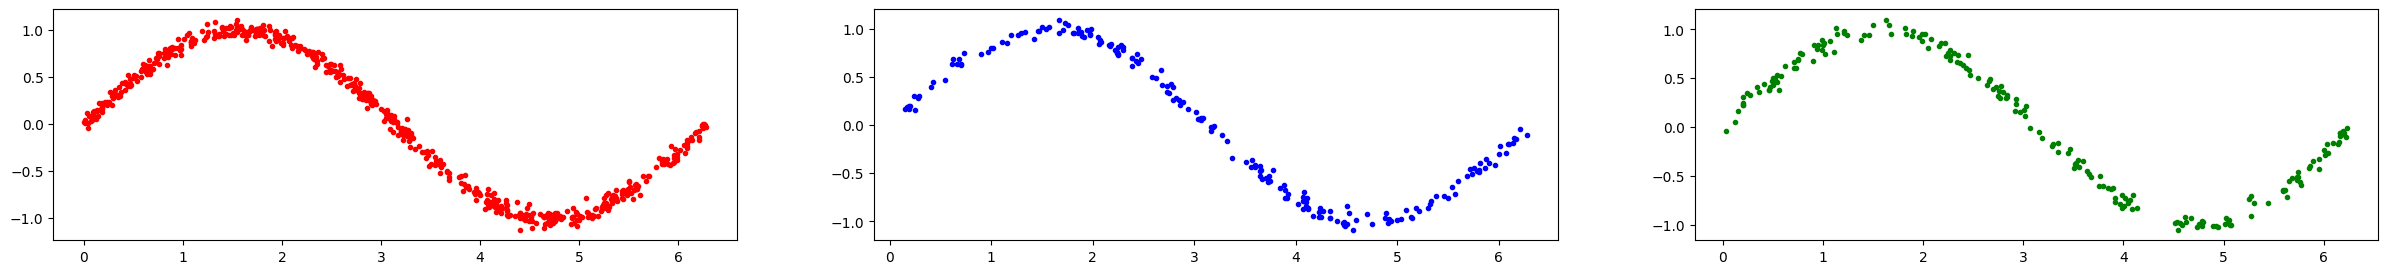

In [77]:
plotter_split  = plt.figure(figsize=(30,3))
plot_x = plotter_split.add_subplot(131)
plot_y = plotter_split.add_subplot(132)
plot_z = plotter_split.add_subplot(133)
plot_x.plot(x_train,y_train,'r.')
plot_y.plot(x_validatate,y_validatate,'b.')
plot_z.plot(x_test,y_test,'g.')
plotter.show()

# Model Creation

In [84]:
sine_model = keras.Sequential()
sine_model.add(keras.layers.Dense(8,name="Input_Layer",input_shape=(1,),activation='relu'))
sine_model.add(keras.layers.Dense(16,name = "Hidden_Layer",activation='relu'))
sine_model.add(keras.layers.Dense(1,name ="Output_Layer"))
sine_model.compile(optimizer='adam',loss='mse',metrics =['mae'])
sine_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer (Dense)                 │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
# prompt: keras output shape (None,8) what is none

# None in the output shape (None, 8) represents the batch size.

# In Keras, when you define a model and summarize it, the output shape often includes "None" in the first dimension.
# This signifies that the model can handle a variable number of input samples in a batch.
# When you train or evaluate the model, you specify the batch size.
# This batch size will then replace "None" in the actual execution.

# For example, if you train with a batch size of 32,
# the input shape during training will be (32, 1), and the output shape of the first layer will be (32, 8).

# In essence, "None" is a placeholder for the dynamic batch size.


In [91]:
sine_model_1_histroy = sine_model.fit(x_train,y_train,batch_size = 32,epochs=500,validation_data=(x_validatate,y_validatate))

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mae: 0.1221 - val_loss: 0.0356 - val_mae: 0.1225
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0378 - mae: 0.1233 - val_loss: 0.0350 - val_mae: 0.1217
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297 - mae: 0.1140 - val_loss: 0.0340 - val_mae: 0.1225
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mae: 0.1113 - val_loss: 0.0337 - val_mae: 0.1201
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0272 - mae: 0.1050 - val_loss: 0.0332 - val_mae: 0.1192
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311 - mae: 0.1142 - val_loss: 0.0325 - val_mae: 0.1184
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0369 - mae: 0.1223 - val_loss: 0.0333 - val_mae: 0.1191
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 - mae: 0.1132 - val_loss: 0.0317 - val_mae: 0.1156
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.030

# Model Loss plot with respect to training and validatation

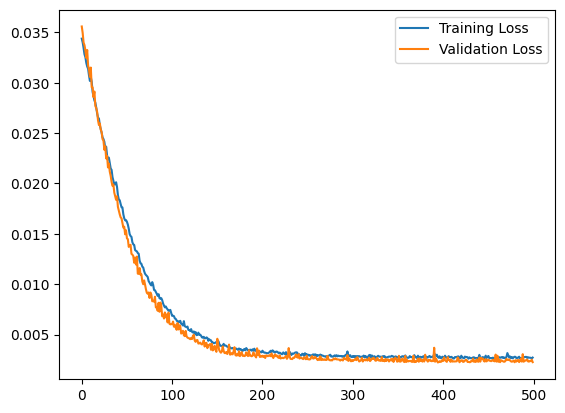

In [92]:
plt.plot(sine_model_1_histroy.history['loss'],label='Training Loss')
plt.plot(sine_model_1_histroy.history['val_loss'],label='Validation Loss')
plt.legend()

# Model Testing

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


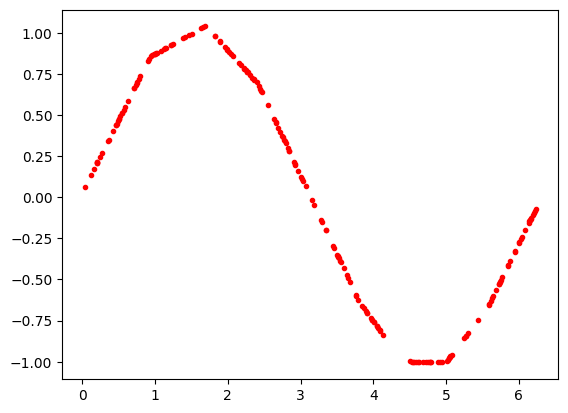

In [93]:
prediction = sine_model.predict(x_test)
plt.plot(x_test,prediction,'r.')

Text(0, 0.5, 'Dependent Values')

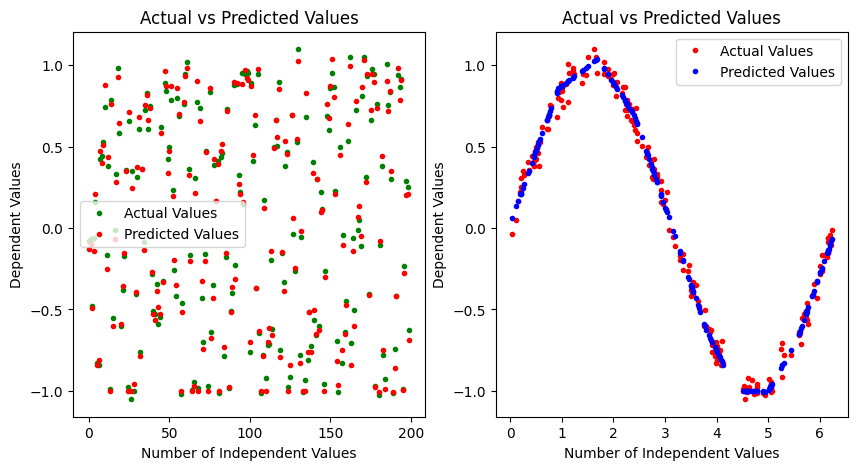

In [101]:
prediction_plotter = plt.figure(figsize=(10,5))
variable_values    = prediction_plotter.add_subplot(121)
prediction_results = prediction_plotter.add_subplot(122)

variable_values.plot(y_test,'g.')
variable_values.plot(prediction,'r.')
variable_values.legend(['Actual Values','Predicted Values'])
variable_values.set_title('Actual vs Predicted Values')
variable_values.set_xlabel('Number of Independent Values')
variable_values.set_ylabel('Dependent Values')

#variable_values.plot(x_test,y_test,'r.')

prediction_results.plot(x_test,y_test,'r.')
prediction_results.plot(x_test,prediction,'b.')
prediction_results.legend(['Actual Values','Predicted Values'])
prediction_results.set_title('Actual vs Predicted Values')
prediction_results.set_xlabel('Number of Independent Values')
prediction_results.set_ylabel('Dependent Values')


# Model Loss Understanding

In [102]:
sine_model_1_histroy.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0.5, 1.0, 'Loss plot of MAE')

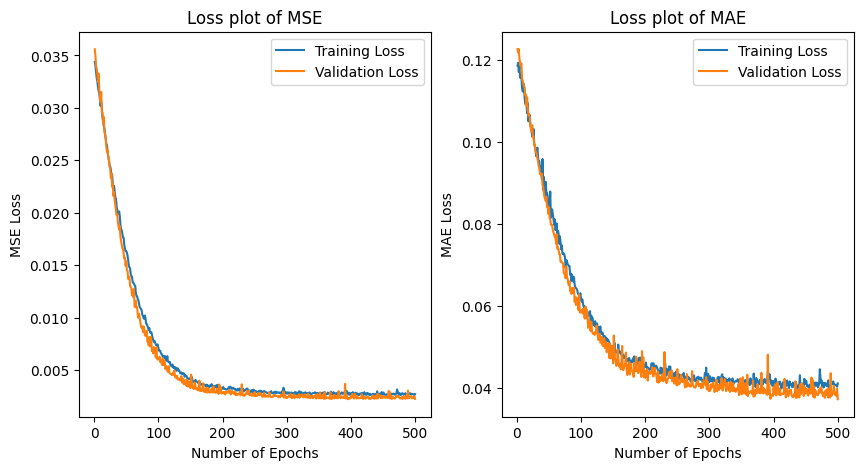

In [105]:
training_loss_MSE      =  sine_model_1_histroy.history['loss']
validation_loss_MSE    =  sine_model_1_histroy.history['val_loss']
training_loss_MAE      =  sine_model_1_histroy.history['mae']
validation_loss_MAE    =  sine_model_1_histroy.history['val_mae']


number_of_epochs       = range(1,len(training_loss_MSE)+1)
loss_plotter           = plt.figure(figsize=(10,5))
mse_plot               = loss_plotter.add_subplot(121)
mae_plot               = loss_plotter.add_subplot(122)



mse_plot.plot(number_of_epochs, training_loss_MSE,label='Training Loss')
mse_plot.plot(number_of_epochs, validation_loss_MSE,label='Validation Loss')
mse_plot.set_xlabel("Number of Epochs")
mse_plot.set_ylabel("MSE Loss")
mse_plot.set_title("Loss plot of MSE")
mse_plot.legend()

mae_plot.plot(number_of_epochs, training_loss_MAE  , label = "Training Loss")
mae_plot.plot(number_of_epochs, validation_loss_MAE, label = "Validation Loss")
mae_plot.legend()
mae_plot.set_xlabel("Number of Epochs")
mae_plot.set_ylabel("MAE Loss")
mae_plot.set_title("Loss plot of MAE")

# plt.plot(sine_model_1_histroy.history['loss'],label='Training Loss')
# plt.plot(sine_model_1_histroy.history['val_loss'],label='Validation Loss')
# plt.legend()

In [135]:
sine_model_1_histroy

#### Understanding much deeper by zooming into it


Text(0.5, 1.0, 'Loss plot of MAE')

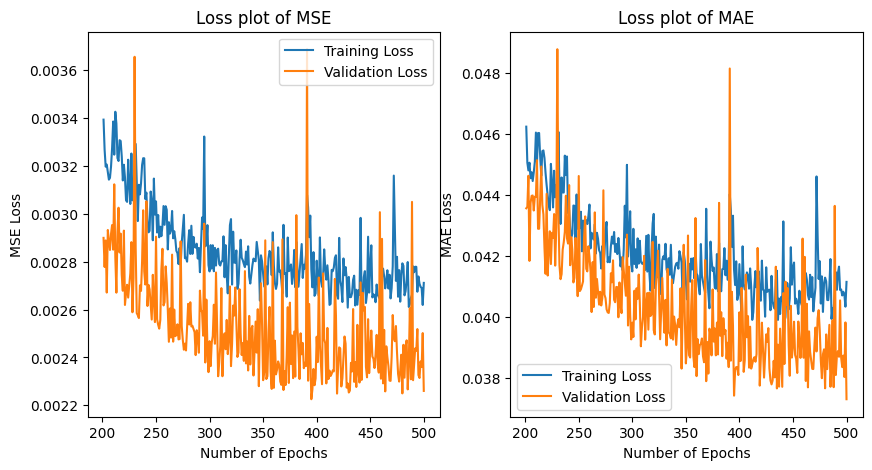

In [110]:
start                  = 200
training_loss_MSE      =  sine_model_1_histroy.history['loss']
validation_loss_MSE    =  sine_model_1_histroy.history['val_loss']
training_loss_MAE      =  sine_model_1_histroy.history['mae']
validation_loss_MAE    =  sine_model_1_histroy.history['val_mae']


number_of_epochs       = range(1,len(training_loss_MSE)+1)
loss_plotter           = plt.figure(figsize=(10,5))
mse_plot               = loss_plotter.add_subplot(121)
mae_plot               = loss_plotter.add_subplot(122)



#mse_plot.plot(number_of_epochs[start:], training_loss_MSE[start:],label='Training Loss')
mse_plot.plot(number_of_epochs[start:], training_loss_MSE[start:],label='Training Loss')
mse_plot.plot(number_of_epochs[start:], validation_loss_MSE[start:],label='Validation Loss')
mse_plot.set_xlabel("Number of Epochs")
mse_plot.set_ylabel("MSE Loss")
mse_plot.set_title("Loss plot of MSE")
mse_plot.legend()

mae_plot.plot(number_of_epochs[start:], training_loss_MAE[start:]  , label = "Training Loss")
mae_plot.plot(number_of_epochs[start:], validation_loss_MAE[start:], label = "Validation Loss")
mae_plot.legend()
mae_plot.set_xlabel("Number of Epochs")
mae_plot.set_ylabel("MAE Loss")
mae_plot.set_title("Loss plot of MAE")

# plt.plot(sine_model_1_histroy.history['loss'],label='Training Loss')
# plt.plot(sine_model_1_histroy.history['val_loss'],label='Validation Loss')
# plt.legend()

# Design of new improved Model

In [111]:
sine_model_Improved = keras.Sequential()
sine_model_Improved.add(keras.layers.Dense(8,name="Input_Layer",input_shape=(1,),activation='relu'))
sine_model_Improved.add(keras.layers.Dense(16,name = "Hidden_Layer1",activation='relu'))
sine_model_Improved.add(keras.layers.Dense(16,name = "Hidden_Layer2",activation='relu'))
sine_model_Improved.add(keras.layers.Dense(16,name = "Hidden_Layer3",activation='relu'))
sine_model_Improved.add(keras.layers.Dense(1,name ="Output_Layer"))
sine_model_Improved.compile(optimizer='adam',loss='mse',metrics =['mae'])
sine_model_Improved.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
sine_model_1_history_improved = sine_model_Improved.fit(x_train,y_train,batch_size = 32,epochs=500,validation_data=(x_validatate,y_validatate))

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.2401 - mae: 1.3821 - val_loss: 0.8267 - val_mae: 0.8325
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6652 - mae: 0.7305 - val_loss: 0.5339 - val_mae: 0.6070
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5177 - mae: 0.6170 - val_loss: 0.4703 - val_mae: 0.5919
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4871 - mae: 0.6180 - val_loss: 0.4328 - val_mae: 0.5791
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4036 - mae: 0.5551 - val_loss: 0.3797 - val_mae: 0.5333
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3483 - mae: 0.5125 - val_loss: 0.3122 - val_mae: 0.4885
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3001 - mae: 0.4773 - val_loss: 0.2239 - val_mae: 0.4216
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2039 - mae: 0.3947 - val_loss: 0.1772 - val_mae: 0.3779
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.14

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0, 0.5, 'Dependent Values')

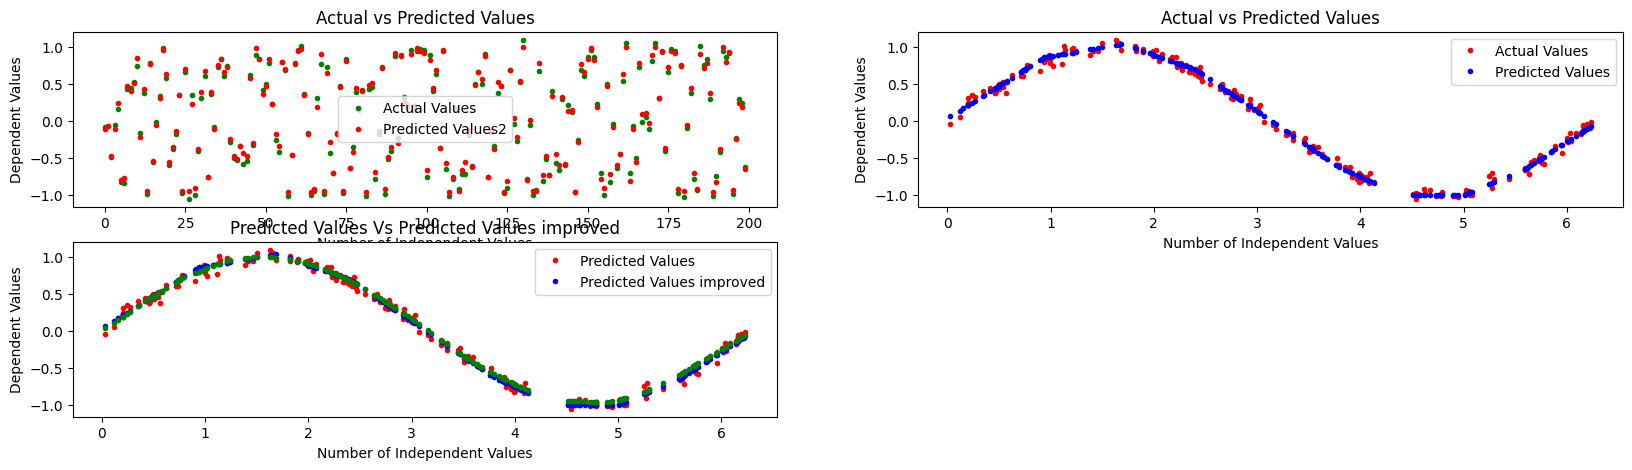

In [129]:
prediction_plotter_improved = plt.figure(figsize=(20,5))
variable_values    = prediction_plotter_improved.add_subplot(221)
prediction_results = prediction_plotter_improved.add_subplot(222)
prediction_results_2 = prediction_plotter_improved.add_subplot(223)
prediction_improved = sine_model_Improved.predict(x_test)

variable_values.plot(y_test,'g.')
variable_values.plot(prediction_improved,'r.')
variable_values.legend(['Actual Values','Predicted Values2'])
variable_values.set_title('Actual vs Predicted Values')
variable_values.set_xlabel('Number of Independent Values')
variable_values.set_ylabel('Dependent Values')

#variable_values.plot(x_test,y_test,'r.')

prediction_results.plot(x_test,y_test,'r.')
prediction_results.plot(x_test,prediction,'b.')
prediction_results.legend(['Actual Values','Predicted Values'])
prediction_results.set_title('Actual vs Predicted Values')
prediction_results.set_xlabel('Number of Independent Values')
prediction_results.set_ylabel('Dependent Values')
prediction_results_2.plot(x_test,y_test,'r.')
prediction_results_2.plot(x_test,prediction,'b.')
prediction_results_2.plot(x_test,prediction_improved,'g.')
prediction_results_2.legend(['Predicted Values','Predicted Values improved'])
prediction_results_2.set_title('Predicted Values Vs Predicted Values improved')
prediction_results_2.set_xlabel('Number of Independent Values')
prediction_results_2.set_ylabel('Dependent Values')


In [130]:
# prompt: prediction_plotter_improved = plt.figure(figsize=(10,5))
# variable_values    = prediction_plotter_improved.add_subplot(221)
# prediction_results = prediction_plotter_improved.add_subplot(222)
# prediction_results_2 = prediction_plotter_improved.add_subplot(211)
# prediction_improved = sine_model_Improved.predict(x_test)

variable_values.plot(y_test, 'g.')
variable_values.plot(prediction_improved, 'r.')
variable_values.legend(['Actual Values', 'Predicted Values'])
variable_values.set_title('Actual vs Predicted Values')
variable_values.set_xlabel('Number of Independent Values')
variable_values.set_ylabel('Dependent Values')

prediction_results.plot(x_test, y_test, 'r.')
prediction_results.plot(x_test, prediction, 'b.')
prediction_results.legend(['Actual Values', 'Predicted Values', 'Predicted Values improved'])
prediction_results.set_title('Actual vs Predicted Values')
prediction_results.set_xlabel('Number of Independent Values')
prediction_results.set_ylabel('Dependent Values')

prediction_results_2.plot(x_test, prediction, 'r.')
prediction_results_2.plot(x_test, prediction_improved, 'b.')
prediction_results_2.legend(['Predicted Values', 'Predicted Values improved'])
prediction_results_2.set_title('Predicted Values Vs Predicted Values improved')
prediction_results_2.set_xlabel('Number of Independent Values')
prediction_results_2.set_ylabel('Dependent Values')


Text(23.999999999999993, 0.5, 'Dependent Values')

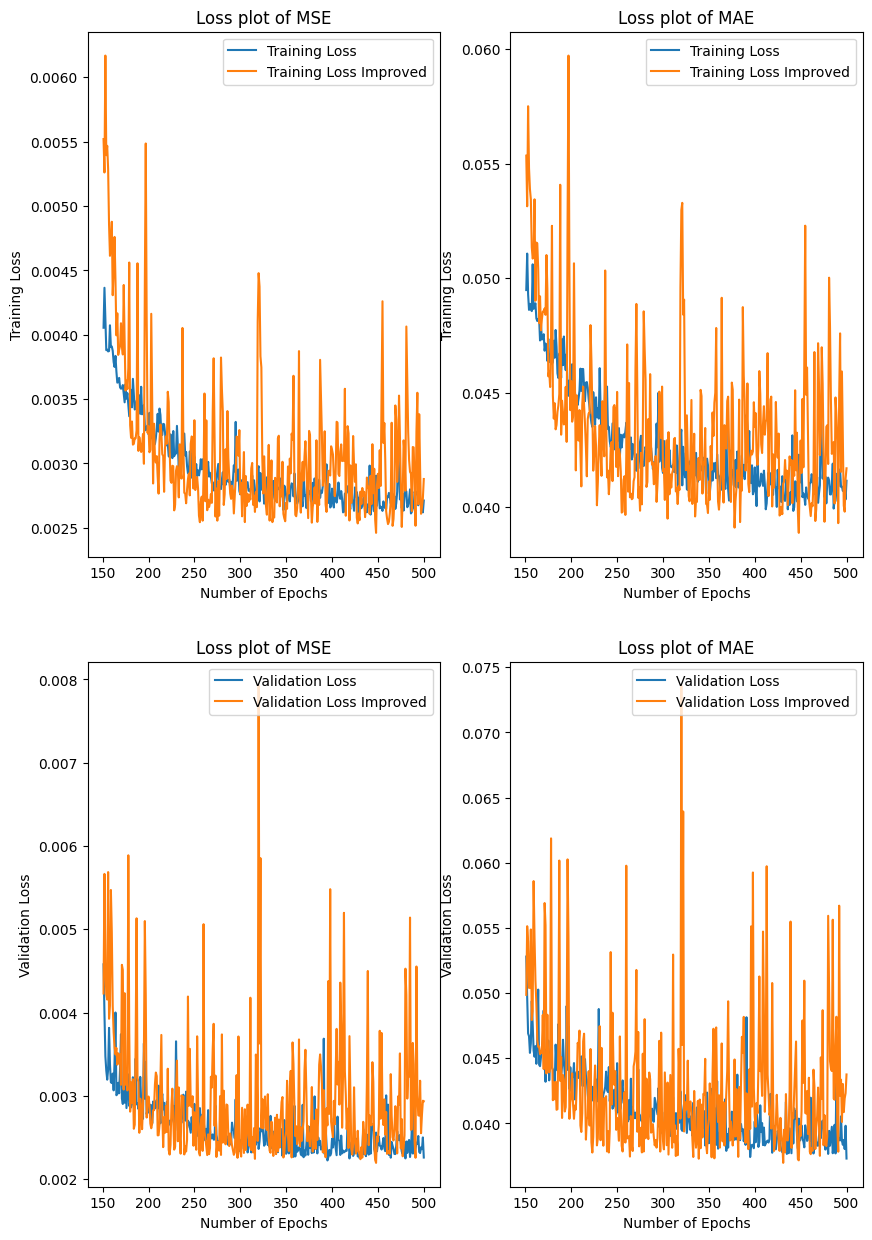

In [144]:
start                   =  150
training_loss_MSE       =  sine_model_1_histroy.history['loss']
validation_loss_MSE     =  sine_model_1_histroy.history['val_loss']
training_loss_MAE       =  sine_model_1_histroy.history['mae']
validation_loss_MAE     =  sine_model_1_histroy.history['val_mae']
training_loss_MSE_2      =  sine_model_1_history_improved.history['loss']
validation_loss_MSE_2    =  sine_model_1_history_improved.history['val_loss']
training_loss_MAE_2      =  sine_model_1_history_improved.history['mae']
validation_loss_MAE_2    =  sine_model_1_history_improved.history['val_mae']


number_of_epochs       = range(1,len(training_loss_MSE)+1)
loss_plotter           = plt.figure(figsize=(10,15))
mse_plot_training      = loss_plotter.add_subplot(221)
mae_plot_training      = loss_plotter.add_subplot(222)
mse_plot_validation    = loss_plotter.add_subplot(223)
mae_plot_validation    = loss_plotter.add_subplot(224)


#mse_plot.plot(number_of_epochs[start:], training_loss_MSE[start:],label='Training Loss')
mse_plot_training.plot(number_of_epochs[start:], training_loss_MSE[start:],label='Training Loss')
mse_plot_training.plot(number_of_epochs[start:], training_loss_MSE_2[start:],label='Training Loss Improved')
mse_plot_training.set_xlabel("Number of Epochs")
mse_plot_training.set_ylabel("Training Loss")
mse_plot_training.set_title("Loss plot of MSE")
mse_plot_training.legend()

mae_plot_training.plot(number_of_epochs[start:], training_loss_MAE[start:],label='Training Loss')
mae_plot_training.plot(number_of_epochs[start:], training_loss_MAE_2[start:],label='Training Loss Improved')
mae_plot_training.set_xlabel("Number of Epochs")
mae_plot_training.set_ylabel("Training Loss")
mae_plot_training.set_title("Loss plot of MAE")
mae_plot_training.legend()



mse_plot_validation.plot(number_of_epochs[start:], validation_loss_MSE[start:],label='Validation Loss')
mse_plot_validation.plot(number_of_epochs[start:], validation_loss_MSE_2[start:],label='Validation Loss Improved')
mse_plot_validation.set_xlabel("Number of Epochs")
mse_plot_validation.set_ylabel("Validation Loss")
mse_plot_validation.set_title("Loss plot of MSE")
mse_plot_validation.legend()

mae_plot_validation.plot(number_of_epochs[start:], validation_loss_MAE[start:],label='Validation Loss')
mae_plot_validation.plot(number_of_epochs[start:], validation_loss_MAE_2[start:],label='Validation Loss Improved')
mae_plot_validation.set_xlabel("Number of Epochs")
mae_plot_validation.set_ylabel("Validation Loss")
mae_plot_validation.set_title("Loss plot of MAE")
mae_plot_validation.legend()
# plt.plot(sine_model_1_histroy.history['loss'],label='Training Loss')
# plt.plot(sine_model_1_histroy.history['val_loss'],label='Validation Loss')
# plt.legend()

# Saving the Model

Saving the model by two methods and two extensions
* tf.keras.models.save_model(MODEL, PATH with .keras or h5 extension)
* keras.models.save_model(MODEL, PATH with .keras or h5 extension)

In [149]:
!ls
%cd /content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations
# %mkdir Udemy_DL_Course
# %cd Udemy_DL_Course
# !pwd

/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations


In [148]:
# %mkdir Sine_function_Approximations
# %cd Sine_function_Approximations
# !pwd

/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations
/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations.

In [165]:
sine_model_Improved.summary()
# sine_model_Improved.save(model_path)
model_path = '/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations'
keras.models.save_model(sine_model_Improved,model_path+'/sine_model_Improved2.keras')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,165 (8.46 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,444 (5.64 KB)

In [164]:
keras.models.save_model(sine_model_Improved,model_path+'/sine_model_Improved2.keras')

In [161]:
model_path

'/content/drive/MyDrive/Udemy_DL_Course/Sine_function_Approximations'

In [162]:
tf.keras.models.save_model(sine_model_Improved,model_path+'/sine_model_Improved.keras')

In [166]:
!ls

sine_model_Improved2.keras  sine_model_Improved.keras


# Loading Models

In [167]:
Load_model = keras.models.load_model(model_path+'/sine_model_Improved.keras')

In [168]:
Load_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer1 (Dense)                │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer2 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer3 (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,165 (8.46 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,444 (5.64 KB)